# Task 2
### Model building

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [20]:
import numpy as np     # numpy for working with arrays or numerical data
import pandas as pd 
import matplotlib.pyplot as plt  #matplotlib and seaborn were used for data visualization - graph plotting.
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("D:/dinsha/++++/data/loan.csv")

In [5]:
applicant = pd.read_csv("D:/dinsha/++++/data/applicant.csv")

In [6]:
data = pd.merge(df,applicant,on='applicant_id')
data

,loan_application_id,applicant_id,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Other_EMI_plans,...,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Telephone,Foreign_worker,Savings_account_balance,Balance_in_existing_bank_account_(lower_limit_of_bucket),Balance_in_existing_bank_account_(upper_limit_of_bucket)
0,d68d975e-edad-11ea-8761-1d6f9c1ff461,1469590,6,electronic equipment,1169000,4,real estate,0,0,NaN,...,own,4,skilled employee / official,7 years,NaN,Registered under the applicant's name,1,NaN,NaN,0
1,d68d989e-edad-11ea-b1d5-2bcf65006448,1203873,48,electronic equipment,5951000,2,real estate,0,0,NaN,...,own,2,skilled employee / official,1 year,4 years,NaN,1,Low,0,2 lac
2,d68d995c-edad-11ea-814a-1b6716782575,1432761,12,education,2096000,2,real estate,0,0,NaN,...,own,3,unskilled - resident,4 years,7 years,NaN,1,Low,NaN,NaN
3,d68d99fc-edad-11ea-8841-17e8848060ae,1207582,42,FF&E,7882000,2,building society savings agreement/life insurance,0,1,NaN,...,for free,4,skilled employee / official,4 years,7 years,NaN,1,Low,NaN,0
4,d68d9a92-edad-11ea-9f3d-1f8682db006a,1674436,24,new vehicle,4870000,3,NaN,0,0,NaN,...,for free,4,skilled employee / official,1 year,4 years,NaN,1,Low,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,d68fbba6-edad-11ea-80fe-30b2f9300e3d,1880194,12,FF&E,1736000,3,real estate,0,0,NaN,...,own,4,unskilled - resident,4 years,7 years,NaN,1,Low,NaN,NaN
996,d68fbc28-edad-11ea-bc62-4240ac0824fa,1114064,30,used vehicle,3857000,4,building society savings agreement/life insurance,0,0,NaN,...,own,4,management / self-employed / highly qualified ...,1 year,4 years,Registered under the applicant's name,1,Low,NaN,0
997,d68fbcaa-edad-11ea-aafc-2de1139e42cd,1758046,12,electronic equipment,804000,4,car or other,0,0,NaN,...,own,4,skilled employee / official,7 years,NaN,NaN,1,Low,NaN,NaN
998,d68fbd2c-edad-11ea-b49e-2894666f2df6,1824545,45,electronic equipment,1845000,4,NaN,0,0,NaN,...,for free,4,skilled employee / official,1 year,4 years,Registered under the applicant's name,1,Low,NaN,0


In [7]:
df = data.drop(['Telephone', 'Other_EMI_plans', 'Balance_in_existing_bank_account_(lower_limit_of_bucket)', 'Balance_in_existing_bank_account_(upper_limit_of_bucket)', 'Has_been_employed_for_at_most'],axis =1)

In [8]:
df1 = df.dropna(subset = ['Property', 'Savings_account_balance', 'Has_been_employed_for_at_least','Purpose'])

In [9]:
# copying the original dataset into X
X=df1
# droping building_id and dependent variable damage_grade
# independant variables
X=X.drop(["high_risk_applicant","applicant_id","loan_application_id"],axis=1)
# dependent variable
y=df1["high_risk_applicant"]

In [21]:
# dependent variable
y=df1["high_risk_applicant"]
# label encoding the categorical variables
label_encoding_columns=['Employment_status', 'Purpose', 'Property',
       'Loan_history', 'Savings_account_balance',
       'Housing', 'Marital_status', 'Gender', 'Has_been_employed_for_at_least']
# label encoding categorical columns in train dataset 
for i in label_encoding_columns:
    X[i]=X[i].astype("category")
    X[i]=X[i].cat.codes
# label encoding categorical columns in test dataset
for j in label_encoding_columns:
    df1[j]=df1[j].astype("category")
    df1[j]=df1[j].cat.codes

In [11]:
x_train, x_test,y_train, y_test = train_test_split(X,y,test_size = 0.20,random_state = 42)

# Decision Tree Classifier

In [12]:
dt = DecisionTreeClassifier(random_state=0)

In [13]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [14]:
prediction = dt.predict(x_test)

In [15]:
cm = confusion_matrix(y_test, prediction)
cm

array([[75, 25],
       [17, 14]], dtype=int64)

In [16]:
accuracy_score(y_test, prediction)

0.6793893129770993

In [17]:
f1_score(y_test,prediction, average="micro")

0.6793893129770993

In [18]:
print("classification report for decision tree :\n\n",classification_report(y_test, prediction))

classification report for decision tree :

               precision    recall  f1-score   support

           0       0.82      0.75      0.78       100
           1       0.36      0.45      0.40        31

    accuracy                           0.68       131
   macro avg       0.59      0.60      0.59       131
weighted avg       0.71      0.68      0.69       131



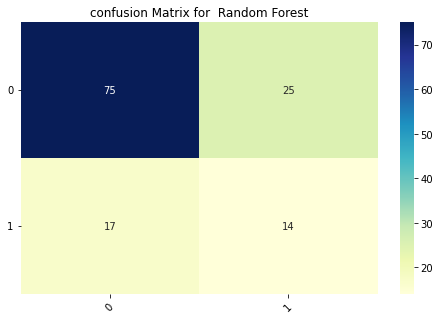

In [22]:
plt.figure(figsize = (8,5))
sns.heatmap(cm, annot=True,fmt='d',cmap="YlGnBu")
plt.title("confusion Matrix for  Random Forest")
plt.xticks(rotation=45)
plt.yticks(rotation=360)
plt.show()

# Random Forest Classifier

In [23]:
clf = RandomForestClassifier(n_estimators = 100, random_state = 18).fit(x_train, y_train)

In [24]:
prediction = clf.predict(x_test)

In [25]:
cm = confusion_matrix(y_test, prediction)
cm

array([[93,  7],
       [22,  9]], dtype=int64)

In [26]:
accuracy_score(y_test, prediction)

0.7786259541984732

In [27]:
f1_score(y_test,prediction, average="micro")

0.7786259541984732

In [28]:
print("classification report for Random Forest :\n\n",classification_report(y_test, prediction))

classification report for Random Forest :

               precision    recall  f1-score   support

           0       0.81      0.93      0.87       100
           1       0.56      0.29      0.38        31

    accuracy                           0.78       131
   macro avg       0.69      0.61      0.62       131
weighted avg       0.75      0.78      0.75       131



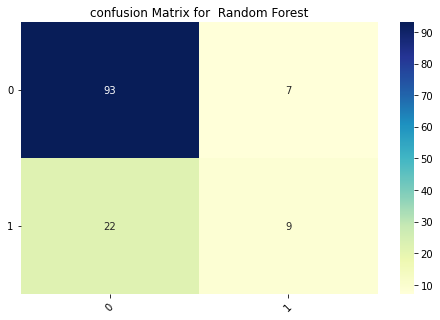

In [29]:
plt.figure(figsize = (8,5))
sns.heatmap(cm, annot=True,fmt='d',cmap="YlGnBu")
plt.title("confusion Matrix for  Random Forest")
plt.xticks(rotation=45)
plt.yticks(rotation=360)
plt.show()

#### Here Random Forest Classifier algorithm able to achieve the F1-score of 0.78 (78%) which is better than decision tree model (68%) 